#### Install yfinance

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

# Forecasting Stocks from Yahoo Finance with Prophet

In [ ]:
import yfinance as yf

# Google
googl = yf.Ticker('GOOGL')

hist = googl.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.496321,2.597672,2.395469,2.504808,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.521534,2.722987,2.508803,2.703765,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.764676,2.832825,2.722238,2.730975,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.776908,2.785895,2.585440,2.617892,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.620139,2.696027,2.593179,2.646101,183772044,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-13 00:00:00-04:00,155.429993,158.380005,155.210007,157.460007,29591200,0.0,0.0
2024-09-16 00:00:00-04:00,157.309998,158.250000,156.600006,158.059998,18379800,0.0,0.0
2024-09-17 00:00:00-04:00,159.020004,160.550003,158.380005,159.320007,20715600,0.0,0.0


In [ ]:
googl.actions


,Dividends,Stock Splits
Date,,
2014-04-03 00:00:00-04:00,0.0,1.998
2022-07-18 00:00:00-04:00,0.0,20.000
2024-06-10 00:00:00-04:00,0.2,0.000
2024-09-09 00:00:00-04:00,0.2,0.000


In [ ]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None) # Romve the time zone
df['y'] = hist['Close'].values # Close price

df.tail()

,ds,y
5051,2024-09-13,157.460007
5052,2024-09-16,158.059998
5053,2024-09-17,159.320007
5054,2024-09-18,159.809998
5055,2024-09-19,162.964996


In [ ]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzz71z_rw/r49tn4h1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzz71z_rw/mwrmtsyc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72489', 'data', 'file=/tmp/tmpzz71z_rw/r49tn4h1.json', 'init=/tmp/tmpzz71z_rw/mwrmtsyc.json', 'output', 'file=/tmp/tmpzz71z_rw/prophet_modelhmtwmmdk/prophet_model-20240919174923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(365) # predict 365 days

forecast = m.predict(future)
#The predict method will assign each row in future a predicted value which it names yhat.
#The forecast object here is a new dataframe that includes a column yhat with the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
5226,2025-03-09,157.213022,144.849271,170.061963
5227,2025-03-10,158.410504,145.462892,170.316491
5228,2025-03-11,158.418386,146.613232,169.987670
5229,2025-03-12,158.481165,144.915684,171.402643
5230,2025-03-13,158.581197,145.917615,171.621945
5231,2025-03-14,158.679844,145.542752,171.194052
5232,2025-03-15,157.681633,144.277947,170.147218
5233,2025-03-16,157.781884,145.171834,169.299687
5234,2025-03-17,159.025381,145.764535,171.027801
5235,2025-03-18,159.073369,146.015750,172.291638


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


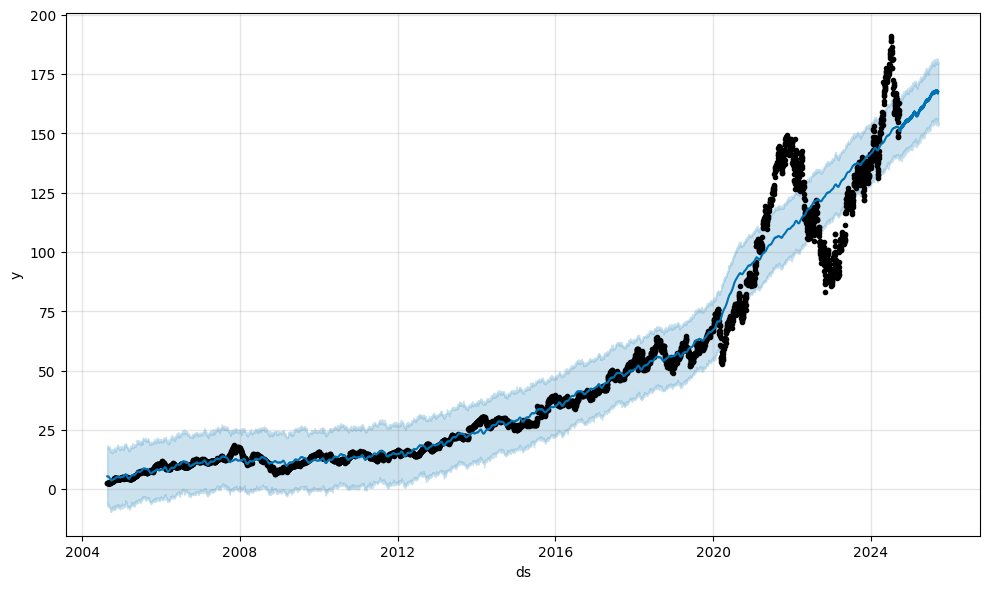

In [ ]:
m.plot(forecast);